Zoe Erpelding, CPSC 322, Fall 2023, Notebook for HW-7

# 1. Load Libraries

 Import the various data and utility functions.

In [1]:
from decision_tree import *
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

# 2. Creating and Drawing Decision Trees

TODO: Create and draw **two** different and interesting decision trees (i.e., with a couple of attributes, multiple values, and multiple leaf nodes). You should create your decision trees directly using the decision tree classes (AttributeNode and LeafNode). Note that to draw the trees, use the draw_tree function with the display flag set to False. The result of the draw tree function can then be displayed inline in the notebook. For example:
 ```python
 diagram = draw_tree(root, 'tmp-1.dot', False)
 diagram
```

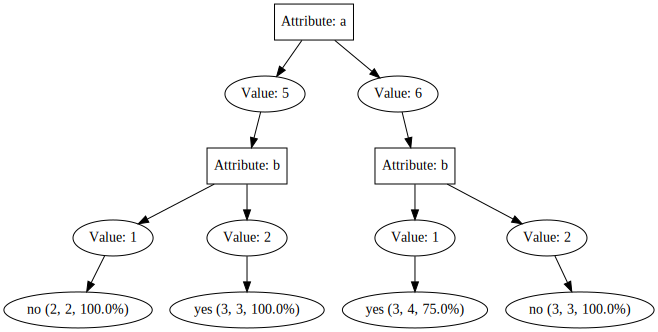

In [2]:
att2 = AttributeNode('b', {1: [LeafNode('no', 2,2)], 2: [LeafNode('yes', 3,3)]})
att3 = AttributeNode('b', {1: [LeafNode('yes', 3,4)], 2: [LeafNode('no', 3,3)]})
root = AttributeNode('a', {5: [att2], 6: [att3]})
diagram = draw_tree(root, 'tmp-1.dot', False)
diagram

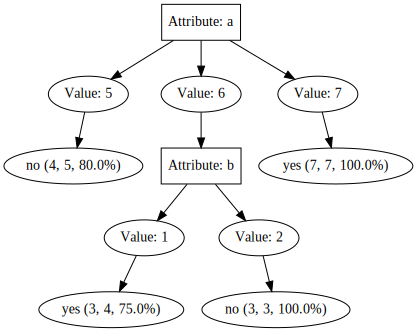

In [3]:
att2 = AttributeNode('b', {1: [LeafNode('no', 2,2)], 2: [LeafNode('yes', 3,3)]})
att3 = AttributeNode('b', {1: [LeafNode('yes', 3,4)], 2: [LeafNode('no', 3,3)]})
root = AttributeNode('a', {5: [LeafNode('no', 4,5)], 6: [att3], 7: [LeafNode('yes', 7,7)]})
diagram = draw_tree(root, 'tmp-1.dot', False)
diagram

# 3. Auto MPG Data Analysis

Load and clean auto data.

In [4]:
auto = DataTable(['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
auto.load('auto-mpg.txt')

#TODO: Clean the auto data by:
#  1. removing all duplicate rows
#  2. removing all rows with missing values in any of the columns
#  Note: these two steps should be carried out with functions we've already defined

## Step 1: Data Prep and Initial Decision Trees 

*TODO: Complete the following steps for the auto mpg data using functions you have implemented:*
1. Remove all duplicate rows
2. Remove all rows with missing values in any of the columns
3. Discretize the mpg value in the auto table using three equal-width bins
4. Create a decision tree from the auto data using your tdidt() function over the attributes 'cyls', 'year', and 'origin' categorical features.
5. Draw the resulting decision tree.
6. Clean up the decision tree using the "resolve attribute values" function
7. Clean up the resulting tree using the "resolve leaf nodes" function
8. Draw the resulting "cleaned up" decision tree
9. Finally, after looking through the decision trees created, provide your observations regarding them and the corresponding rules they capture. You don't need to list all the rules, but provide some general observations on the trees. 

In [5]:
auto = remove_duplicates(auto)
auto = remove_missing(auto, ['mpg','cyls','disp','hp','weight','accl','year','origin','name'])
width = (summary_stat(auto, 'mpg', max) - summary_stat(auto, 'mpg', min))/ 3
discretize(auto, 'mpg', [summary_stat(auto, 'mpg', min) + width, summary_stat(auto, 'mpg', min) + width + width])

In [6]:
tree = tdidt(auto, 'mpg', ['cyls', 'year', 'origin'])

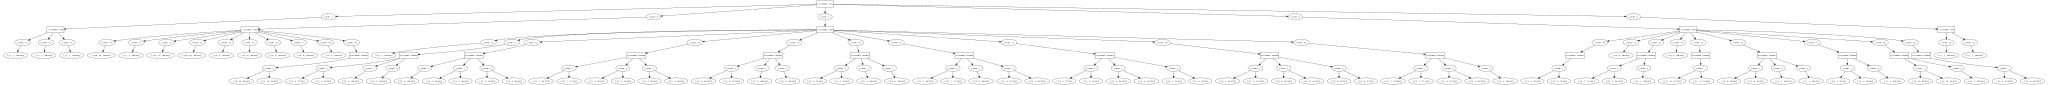

In [7]:
diagram = draw_tree(tree, 'tmp-1.dot', False)
diagram

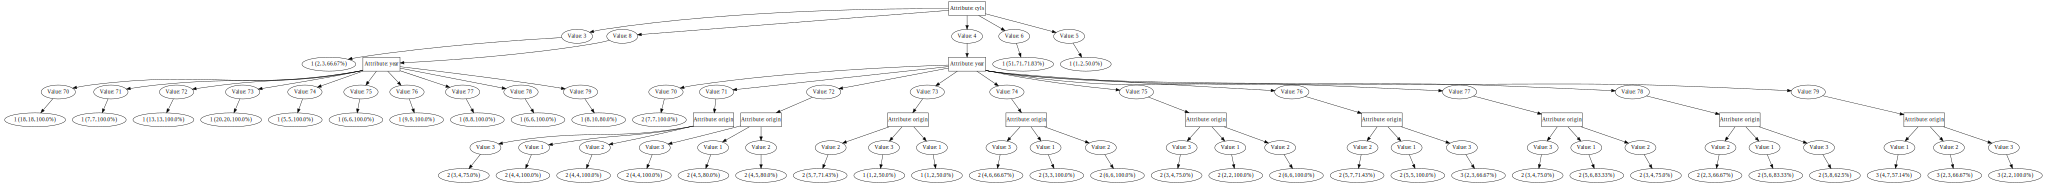

In [8]:
tree = resolve_attribute_values(tree, auto)
tree = resolve_leaf_nodes(tree)
diagram = draw_tree(tree, 'tmp-1.dot', False)
diagram

Observations about Rules:
If there are 6 cyls, then the mpg value is in bin 1. If there are 5 cyls, then the mpg value will be predicted to be in bin 1, but there was only 50% of rows that follow that. If there are 3 cyls, then the mpg value will be predicted to be in bin 1. If the cyls value is 8 or 4, there are more rules to consider. The rules first consider cyls, then splits on year, then on origin if still needed. 

## Step 2: Experimentation with Auto MPG Data Classification

*TODO: Use stratified k-fold cross validation (i.e., your tdidt_stratified() function) to predict mpg labels using 10 folds. Display the resulting confusion matrix. In addition, compute accuracy, precision, recall, and the f-measure over the resulting confusion matrix and display each. Compare your results to the results you obtained using knn and naive bayes in HW-6* 

In [28]:
matrix = tdidt_stratified(auto, 10, 'mpg', ['cyls', 'year', 'origin'])
print(matrix)

  actual    2    1    3
--------  ---  ---  ---
       2   92   26    5
       1   11  151    0
       3   20    0    2


In [29]:
avg_accuracy = (accuracy(matrix, 1)+accuracy(matrix,2)+accuracy(matrix,3))/3
print(f'The average accuracy of dt is {avg_accuracy}')
avg_precision = (precision(matrix, 1) + precision(matrix, 2) + precision(matrix, 3))/3
print(f'The average precision of dt is {avg_precision}')
avg_recall = (recall(matrix, 1) + recall(matrix,2) + recall(matrix,3))/3
print(f'The average recall of dt is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of dt is {avg_fmeasure}')

The average accuracy of dt is 0.8653637350705754
The average precision of dt is 0.6289297033406168
The average recall of dt is 0.5903251120053288
The f-measure of dt is 0.6090162497536408


Comparison: Using Decision Tree, the accuracy is similar to the accuracy of knn, but the precision, recall, and f-measure are all better for decision trees. When using certain parameters (testing on specific attributes with 19 folds), all measures were better for naive bayes than decision trees. 

# 4. Titanic Data Analysis

Load the titanic data set below. The attributes are *class*, *age*, *gender*, and *survival*.

In [11]:
# TODO: load the titanic data set below. Note no cleaning is needed.

In [21]:
titanic = DataTable(['class', 'age', 'gender', 'survival'])
titanic.load('titanic.txt')

*TODO: Repeat steps 1 and 2 (as appropriate) from Section 3 for the titanic data set. Again, compare your results to the results you obtained using knn and naive bayes for the titanic data set in HW-6.*

In [22]:
#titanic = remove_duplicates(titanic)
#titanic = remove_missing(titanic, ['class', 'age', 'gender', 'survival'])
tree = tdidt(titanic, 'survival', ['class', 'age', 'gender'])

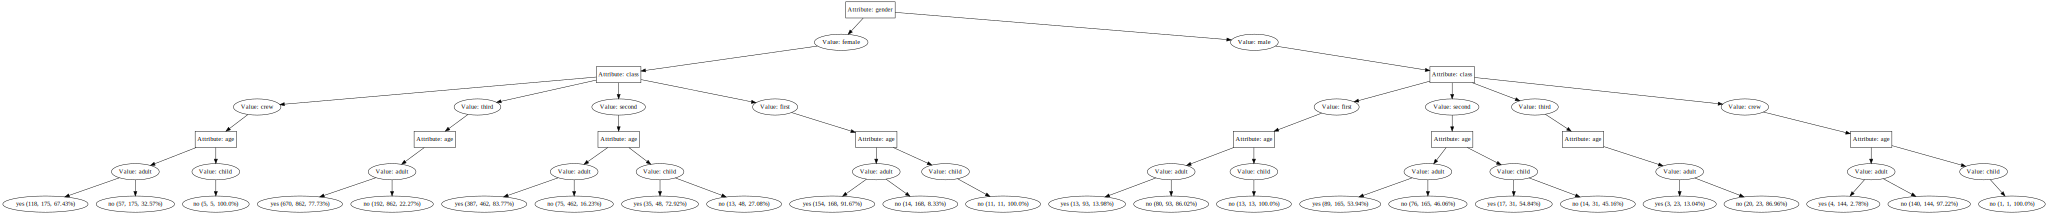

In [23]:
diagram = draw_tree(tree, 'tmp-1.dot', False)
diagram

In [24]:
tree = resolve_attribute_values(tree, titanic)
tree = resolve_leaf_nodes(tree)

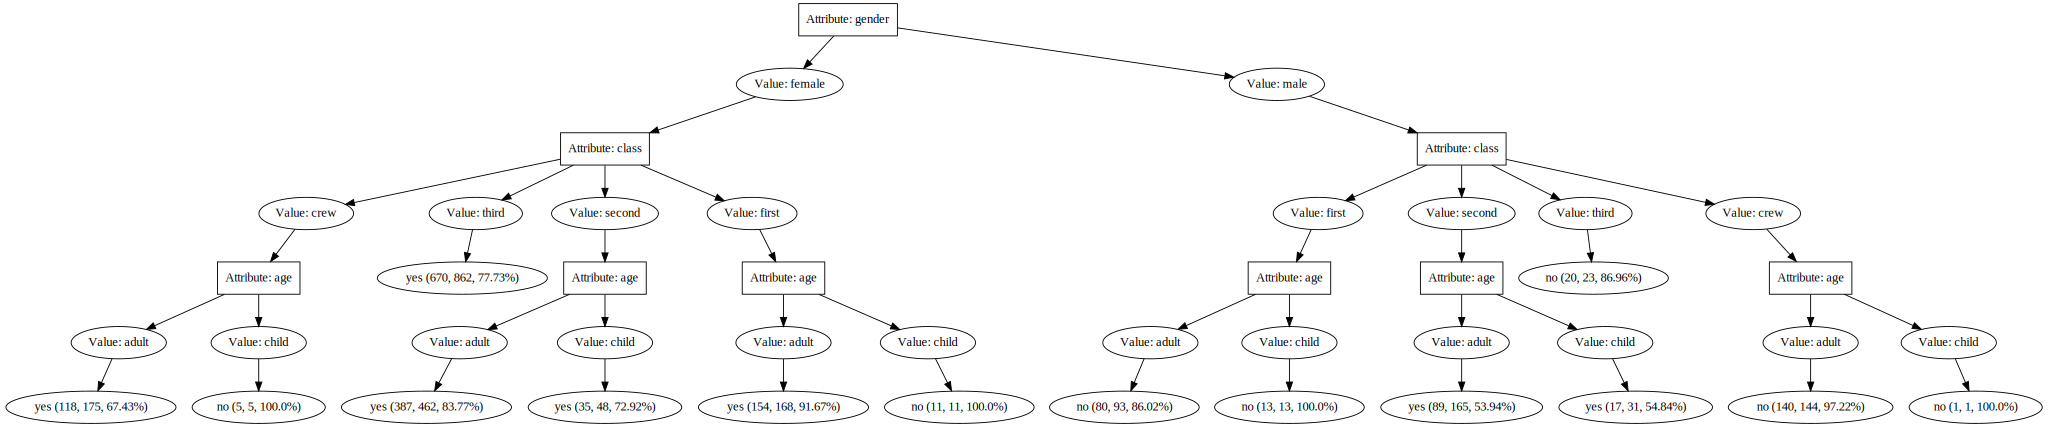

In [25]:
diagram = draw_tree(tree, 'tmp-1.dot', False)
diagram

Observations about rules:
First the tree splits on gender. From there, it considers class then age. If a person is female and third class, they are predicted to have survived. If they were male and third class, they are predicted to have not survived. Female children who were on the crew are predicted to have died while female adults on the crew are predicted to survive. Males in first class are predicted to have died for both adult and child ages, while second class males of both ages are predicted to have survived.  

In [30]:
matrix = tdidt_stratified(titanic, 10, 'survival', ['class', 'age', 'gender'])
print(matrix)

actual      yes    no
--------  -----  ----
yes        1470    20
no          443   268


In [32]:
avg_accuracy = (accuracy(matrix, 'yes')+accuracy(matrix,'no'))/2
print(f'The average accuracy of decision tree is {avg_accuracy}')
avg_precision = (precision(matrix, 'yes') + precision(matrix, 'no'))/2
print(f'The average precision of decision tree is {avg_precision}')
avg_recall = (recall(matrix, 'yes') + recall(matrix,'no') )/2
print(f'The average recall of decision tree is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of decision tree is {avg_fmeasure}')

The average accuracy of decision tree is 0.789641072239891
The average precision of decision tree is 0.8494910553522681
The average recall of decision tree is 0.6817555385646457
The f-measure of decision tree is 0.7564362712684792


The accuracy of decision tree and naive bayes are similar, but the recall of naive bayes is higher than decision trees. The precision of decision trees is higher than naive bayes. Knn has similar outcomes but decision trees performs better in general. 

# 5. Student Stress Data Analysis

Load the student stress data set below. The attributes are given below in column order, where the short name to use is given in parenthesis: 
1. sleep_quality (sleep)
2. living_conditions (living)
3. basic_needs (basics)
4. academic_performance (academic)
5. study_load (study)
6. future_career_concerns (career)
7. social_support (social)
8. extracurricular_activities (extra)
9. stress_level (stress)

In [12]:
# TODO: Load the student stress data set

In [34]:
stress = DataTable(['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra', 'stress'])
stress.load('student-stress.txt')

*TODO: Repeat steps 1 and 2 (as appropriate) from Section 3 for the student stress data set (using the same features as in HW-6). Again, compare your results to the results you obtained using knn and naive bayes for the student stress data set in HW-6.*

In [35]:
tree = tdidt(stress, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])

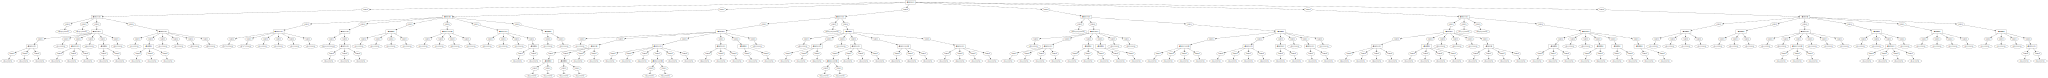

In [36]:
diagram = draw_tree(tree, 'tmp-1.dot', False)
diagram

In [37]:
tree = resolve_attribute_values(tree, stress)
tree = resolve_leaf_nodes(tree)

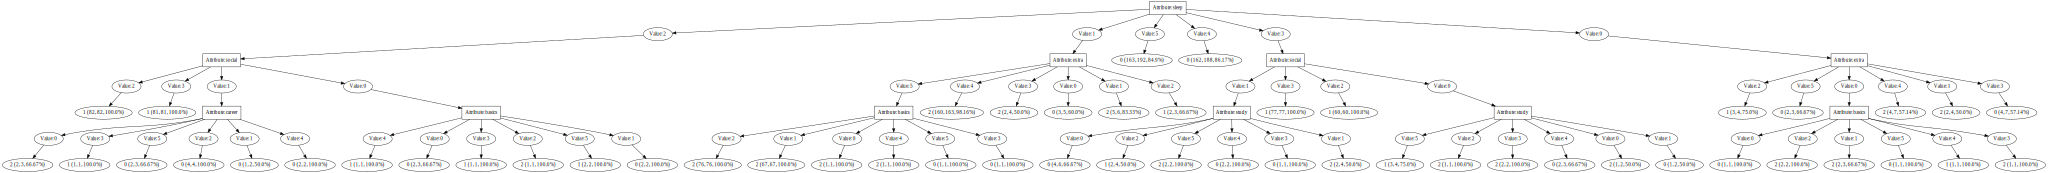

In [38]:
diagram = draw_tree(tree, 'tmp-1.dot', False)
diagram

Observations about rules:
The tree is first split off of sleep, showing that sleep plays a large role in separating stress levels. If sleep was ranked at a 4 or 5, then stress will be predicted to be 0. Next, the tree splits on extra or social. Those with sleep value 1 and extra value 1, 3, or 4 will be predicted to have stress value 2. Those with sleep value 2 and social value 2 or 3 will be predicted to have a stress value of 1. 

In [39]:
matrix = tdidt_stratified(stress, 10, 'stress', ['sleep', 'living', 'basics', 'academic', 'study', 'career', 'social', 'extra'])
print(matrix)

  actual    1    2    0
--------  ---  ---  ---
       1  314   14   30
       2   12  317   40
       0    9   23  341


In [40]:
avg_accuracy = (accuracy(matrix, 0)+accuracy(matrix,1)+accuracy(matrix,2))/3
print(f'The average accuracy of decision tree is {avg_accuracy}')
avg_precision = (precision(matrix, 0) + precision(matrix, 1)+precision(matrix, 2))/3
print(f'The average precision of decision tree is {avg_precision}')
avg_recall = (recall(matrix, 0) + recall(matrix,1)+recall(matrix,2))/3
print(f'The average recall of decision tree is {avg_recall}')
avg_fmeasure = (2*avg_recall*avg_precision)/(avg_recall+avg_precision)
print(f'The f-measure of decision tree is {avg_fmeasure}')

The average accuracy of decision tree is 0.9224242424242424
The average precision of decision tree is 0.8874924523737863
The average recall of decision tree is 0.8834608927114829
The f-measure of decision tree is 0.8854720836376372


The results from the decision tree is very similar but slightly better than naive bayes. Decision tree results are significantly better than knn results which are between 0.4-0.6 compares to the .88-.93 results of the decision tree.  

# 6. Issues, Challenges, and Observations

*TODO: Write down any issues and/or challenges that you had with the assignment. In addition, write down a summary of your observations and brief explanations for the results you obtained based on your understanding of the algorithms.*

I had issues understanding the recursion needed for the resolve functions. The resolve leaf nodes came more naturally to me after a little trial and error, but the resolve attributes was confusing for me because I struggled to understand where the recursion should be called inside the function so that you continue to backtrack through the nodes. I think the syntax with the attribute and leafnodes is still a little confusing for me just because it is so new. Specifically the concept of iterating through the nodes was difficult for me. My results show that the cleaned trees are a good classifier for our datasets we used to test. In comparison to naive bayes and knn, it matches whichever is better between those for the given dataset. The algorithms built the trees using entropy which looks for what attribute will create the most unevenly distributed partitions in relation to the class label. 